# REAL ESTATE PROJECT 

In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn xgboost jupyterlab numpy lightgbm

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached jupyter_lsp-2.2.5-py3-none-any.whl.metadata (1.8 kB)
  Using cached jupyterlab_server-2.27.3-py3-none-any.whl.metadata (5.9 kB)
  Using cached notebook_shim-0.2.4-py3-none-any.whl.metadata (4.0 kB)
  Using cached jupyter_server_terminals-0.5.3-py3-none-any.whl.metadata (5.6 kB)
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached overrides-7.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached Send2Trash-1.8.3-py3-none-any.whl.metadata (4.0 kB)
  Using cached terminado-0.18.1-py3-none-any.whl.metadata (5.8 kB)
  Using cached websocket_client-1.8.0-py3-none-any.whl.metadata (8.0 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadat

### Data Set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Airbnb_Data.csv")

df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


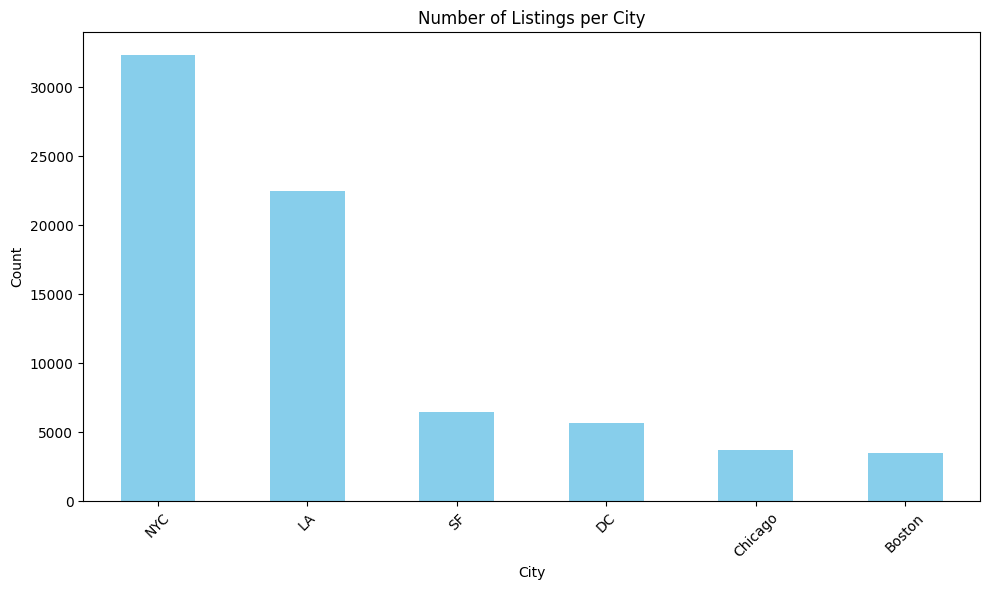

In [3]:
city_counts = df['city'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Listings per City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

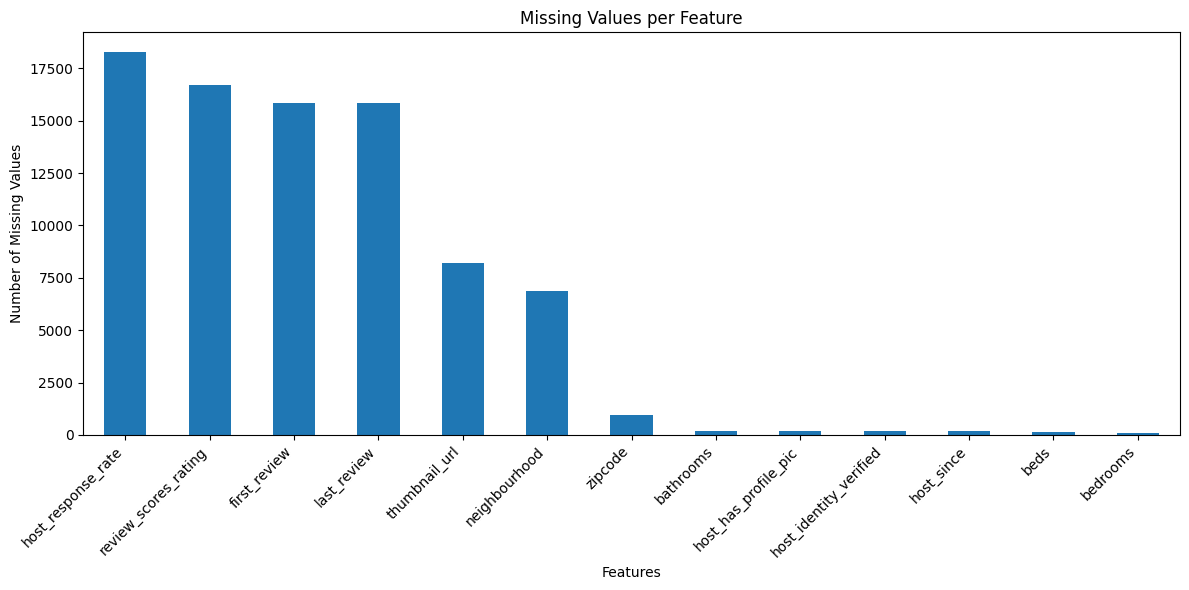

In [4]:
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]  # Only show features with missing values

# Sort by number of missing values
missing_counts = missing_counts.sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
missing_counts.plot(kind='bar')
plt.title('Missing Values per Feature')
plt.ylabel('Number of Missing Values')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

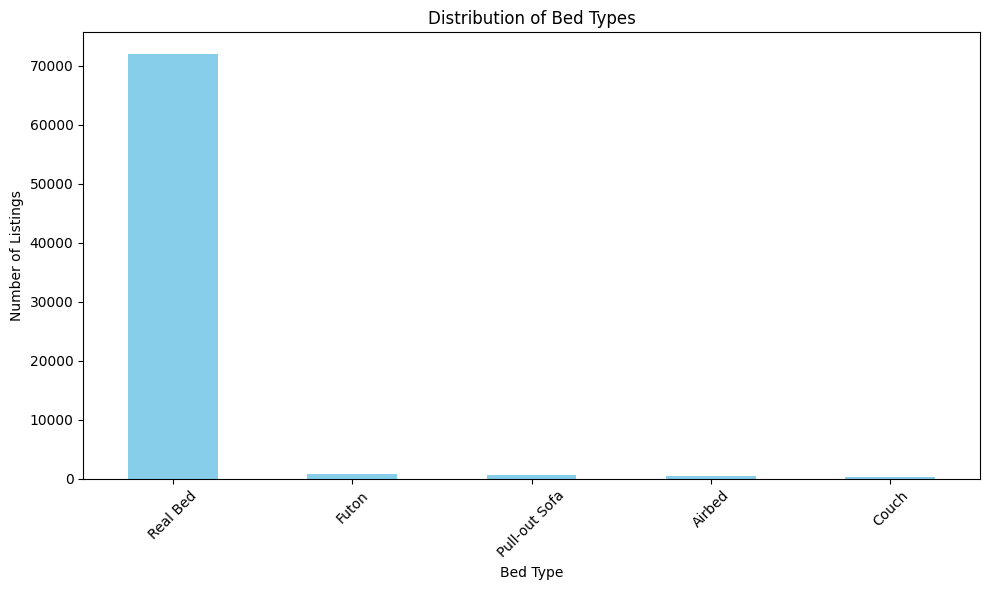

In [5]:
bed_type_counts = df['bed_type'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))
bed_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Bed Types')
plt.xlabel('Bed Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

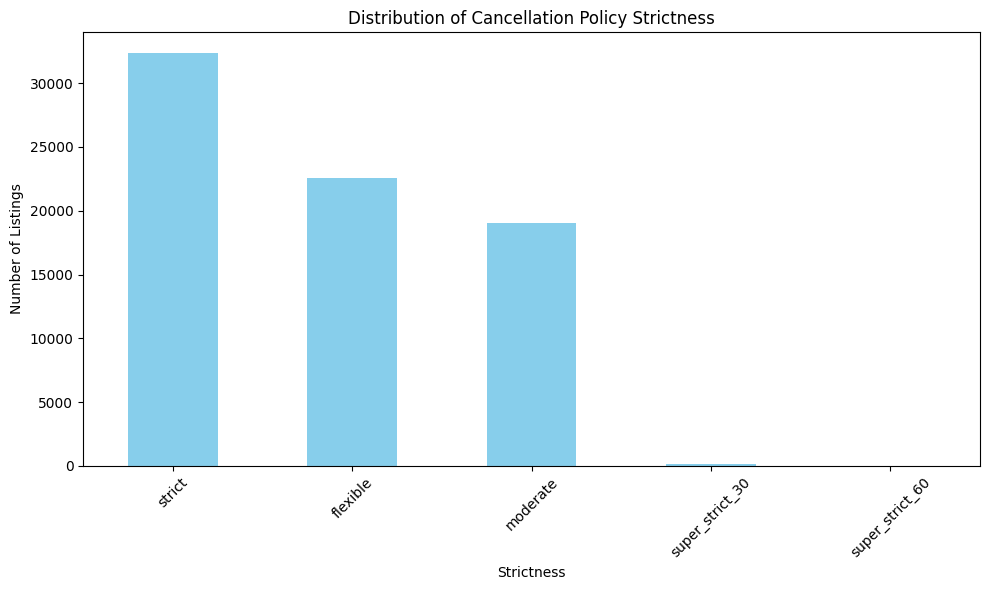

In [6]:
bed_type_counts = df['cancellation_policy'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))
bed_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Cancellation Policy Strictness')
plt.xlabel('Strictness')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

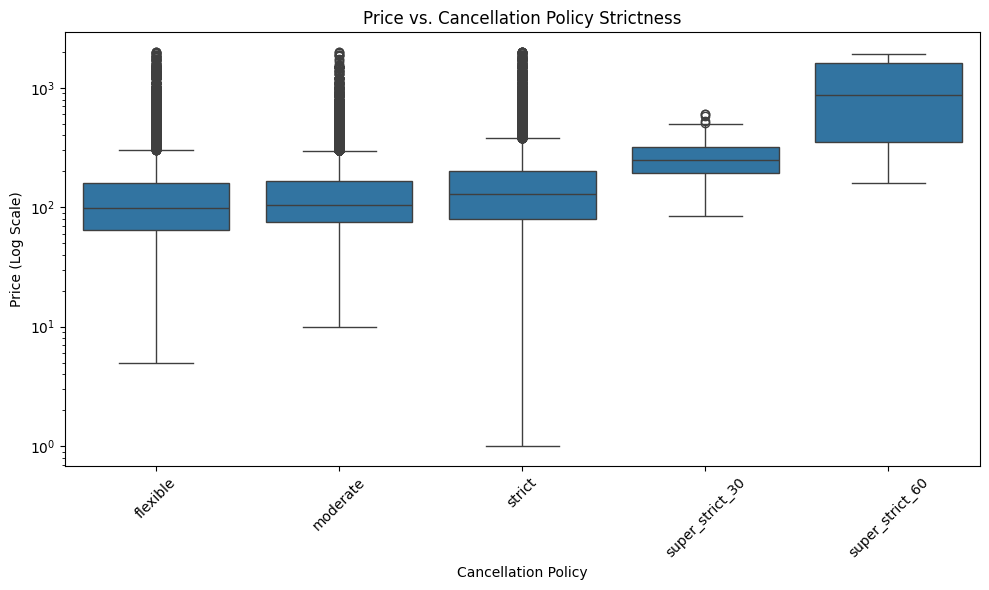

In [7]:
import seaborn as sns
import numpy as np

# Step 1: Unlog price
df['price'] = np.exp(df['log_price'])

# Step 2: Define strictness ranking (you can tweak these)
strictness_order = {
    'flexible': 0,
    'moderate': 1,
    'strict': 2,
    'super_strict_30': 3,
    'super_strict_60': 4
}

df['strictness_level'] = df['cancellation_policy'].map(strictness_order)

# Optional: Drop NaNs in strictness_level
df = df.dropna(subset=['strictness_level'])

# Step 3: Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='cancellation_policy',
    y='price',
    order=sorted(strictness_order.keys(), key=lambda k: strictness_order[k])
)
plt.yscale('log')  # log scale to reduce skew in the plot
plt.title('Price vs. Cancellation Policy Strictness')
plt.xlabel('Cancellation Policy')
plt.ylabel('Price (Log Scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

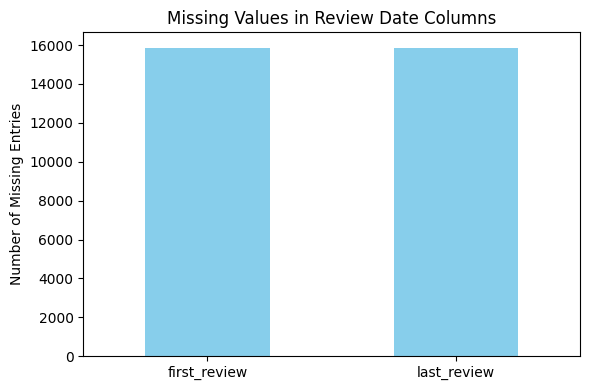

In [8]:
missing_counts = df[['first_review', 'last_review']].isnull().sum()

# Plot the missing values
plt.figure(figsize=(6, 4))
missing_counts.plot(kind='bar', color='skyblue')
plt.title('Missing Values in Review Date Columns')
plt.ylabel('Number of Missing Entries')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

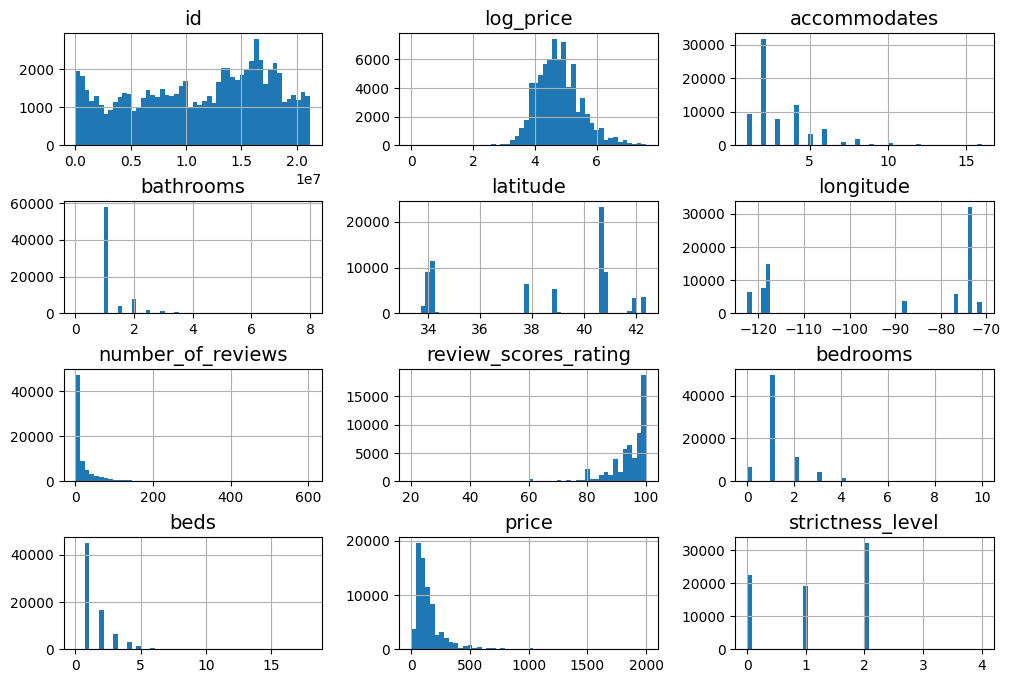

In [10]:
import matplotlib.pyplot as plt

plt.rc('font', size=10)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
df.hist(bins=50, figsize=(12, 8))

plt.subplots_adjust(hspace=0.5)
plt.show()

In [11]:
import pandas as pd
def unique_values(df):
    for col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")

unique_values(df)

id: 74111 unique values
log_price: 767 unique values
property_type: 35 unique values
room_type: 3 unique values
amenities: 67122 unique values
accommodates: 16 unique values
bathrooms: 17 unique values
bed_type: 5 unique values
cancellation_policy: 5 unique values
cleaning_fee: 2 unique values
city: 6 unique values
description: 73479 unique values
first_review: 2554 unique values
host_has_profile_pic: 2 unique values
host_identity_verified: 2 unique values
host_response_rate: 80 unique values
host_since: 3087 unique values
instant_bookable: 2 unique values
last_review: 1371 unique values
latitude: 74111 unique values
longitude: 74111 unique values
name: 73359 unique values
neighbourhood: 619 unique values
number_of_reviews: 371 unique values
review_scores_rating: 54 unique values
thumbnail_url: 65883 unique values
zipcode: 769 unique values
bedrooms: 11 unique values
beds: 18 unique values
price: 767 unique values
strictness_level: 5 unique values


## Creating a Test Set

### Data Encoding & Cleaning

In [12]:
pip install vaderSentiment textblob plotly folium

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
def nan_values(df):
    for col in df.columns:
        print(f"{col}: {df[col].isna().sum()} NAN values")

nan_values(df)

id: 0 NAN values
log_price: 0 NAN values
property_type: 0 NAN values
room_type: 0 NAN values
amenities: 0 NAN values
accommodates: 0 NAN values
bathrooms: 200 NAN values
bed_type: 0 NAN values
cancellation_policy: 0 NAN values
cleaning_fee: 0 NAN values
city: 0 NAN values
description: 0 NAN values
first_review: 15864 NAN values
host_has_profile_pic: 188 NAN values
host_identity_verified: 188 NAN values
host_response_rate: 18299 NAN values
host_since: 188 NAN values
instant_bookable: 0 NAN values
last_review: 15827 NAN values
latitude: 0 NAN values
longitude: 0 NAN values
name: 0 NAN values
neighbourhood: 6872 NAN values
number_of_reviews: 0 NAN values
review_scores_rating: 16722 NAN values
thumbnail_url: 8216 NAN values
zipcode: 966 NAN values
bedrooms: 91 NAN values
beds: 131 NAN values
price: 0 NAN values
strictness_level: 0 NAN values


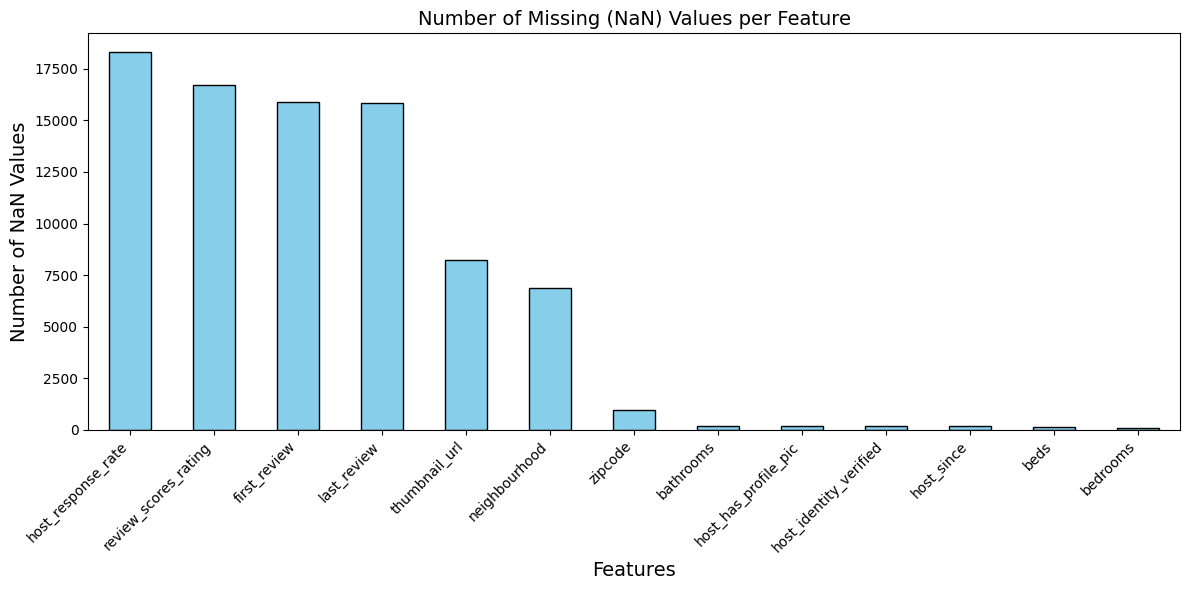

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is called df
nan_counts = df.isna().sum()
nan_counts = nan_counts[nan_counts > 0].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
nan_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Number of Missing (NaN) Values per Feature")
plt.xlabel("Features")
plt.ylabel("Number of NaN Values")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from datetime import datetime
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler

class DataPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, impute_strategy="mean", encode_type="onehot"):
        self.impute_strategy = impute_strategy
        self.encode_type = encode_type
        self.analyzer = SentimentIntensityAnalyzer()

        self.imputers = {
            "host_response_rate": SimpleImputer(strategy="constant", fill_value=0),
            "review_scores_rating": SimpleImputer(strategy="median"),
            "first_review": SimpleImputer(strategy="constant", fill_value="2000-01-01"),
            "last_review": SimpleImputer(strategy="constant", fill_value="2000-01-01"),
            "thumbnail_url": SimpleImputer(strategy="constant", fill_value="missing_thumbnail"),
            "neighbourhood": SimpleImputer(strategy="constant", fill_value="missing"),
            "zipcode": SimpleImputer(strategy="constant", fill_value="00000"),
            "bathrooms": SimpleImputer(strategy="median"),
            "bedrooms": SimpleImputer(strategy="median"),
            "beds": SimpleImputer(strategy="median"),
            "host_has_profile_pic": SimpleImputer(strategy="constant", fill_value="f"),
            "host_identity_verified": SimpleImputer(strategy="constant", fill_value="f"),
            "host_since": SimpleImputer(strategy="constant", fill_value="2000-01-01"),
        }

        self.encoders = {
            "mapping": {
                "room_type": {
                    "Private room": 0,
                    "Entire home/apt": 1,
                    "Shared room": 2
                },
                "bed_type": {
                    "Real Bed": 5,
                    "Futon": 4,
                    "Pull-out Sofa": 3,
                    "Airbed": 2,
                    "Couch": 1,
                },
                "cancellation_policy_map_s": {
                    'flexible': 0.0,
                    'moderate': 0.33,
                    'strict': 0.66,
                    'super_strict_30': 0.83,
                    'super_strict_60': 1.0
                },
                "cancellation_policy_map_f": {
                    'flexible': 1.0,
                    'moderate': 0.66,
                    'strict': 0.33,
                    'super_strict_30': 0.16,
                    'super_strict_60': 0.0
                }
            }
        }

        self.bool_cols = ["host_has_profile_pic", "host_identity_verified", "instant_bookable"]
        self.map_cols = ["bed_type", "room_type"]

        self.city_sentiment = {
            "NYC": 0.75, "LA": 0.78, "SF": 0.85, "DC": 0.73, "Chicago": 0.60, "Boston": 0.90
        }

        self.city_expense_worth = {
            "NYC": 0.55, "LA": 0.58, "SF": 0.50, "DC": 0.78, "Chicago": 0.72, "Boston": 0.75
        }

        self.city_centers = {
            'NYC': (40.7549, -73.984),
            'LA': (34.0557, -118.2488),
            'SF': (37.7876, -122.4066),
            'DC': (38.9037, -77.0363),
            'Chicago': (41.8757, -87.6243),
            'Boston': (42.3555, -71.0565)
        }

    def sentiment_score(self, X):
        def compute_sentiment(text):
            if not isinstance(text, str) or text.strip() == "":
                return 0
            return self.analyzer.polarity_scores(text)['compound']
        X['sentiment'] = X['description'].apply(compute_sentiment)
        return X

    def objectivity_score(self, X):
        def compute_obj(text):
            if not isinstance(text, str): return 0
            return 1 - TextBlob(text).sentiment.subjectivity
        X['objectivity'] = X['description'].apply(compute_obj)
        return X

    def combine_sentiment_subjectivity(self, sentiment, objectivity, sentiment_weight=0.7, objectivity_weight=0.3):
        sentiment_norm = (sentiment + 1) / 2
        return sentiment_weight * sentiment_norm + objectivity_weight * objectivity

    def day_since(self, start, end):
        start = pd.to_datetime(start, errors="coerce")
        end = pd.to_datetime(end, errors="coerce")
        return (end - start).days if pd.notnull(start) and pd.notnull(end) else -1

    def _compute_amenity_score(self, X, top_k=30):
        pet_map = [
            "Pets live on this property", "Pets allowed", "Dog(s)", "Cat(s)", "Other pet(s)"
        ]
        amenities_map = {
            "Wireless Internet": "Internet",
            "Dryer": "Dryer/Washer",
            "Washer": "Dryer/Washer",
            "Dishwasher": "Dryer/Washer",
            "Central Heating": "Heating",
            **{p: "Pet-Friendly" for p in pet_map}
        }

        def map_amenities(amenity_list):
            return [amenities_map.get(a.strip().strip('"'), a.strip().strip('"')) for a in amenity_list]

        X = X.copy()
        X['standard_amenities'] = X['split_amenities'].apply(map_amenities)
        X['amenities_str'] = X['standard_amenities'].apply(lambda x: ','.join(x))

        vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split(','), lowercase=False)
        tfidf = vectorizer.fit_transform(X['amenities_str'])
        tfidf_df = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names_out(), index=X.index)

        top_amenities = tfidf_df.mean().sort_values(ascending=False).head(top_k).index
        tfidf_top_df = tfidf_df[top_amenities]

        X['amenity_score'] = tfidf_top_df.sum(axis=1)
        scaler = MinMaxScaler()
        X['amenity_score_normalized'] = scaler.fit_transform(X[['amenity_score']])

        return pd.concat([X, tfidf_top_df], axis=1)

    def haversine(self, lat1, lon1, lat2, lon2):
        R = 6371
        lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
        dlat = lat2 - lat1
        dlon = lon2 - lon1
        a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
        return R * 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    def add_distance_to_city_center(self, X, city_col='city', lat_col='latitude', lon_col='longitude'):
        def compute_distance(row):
            city = row[city_col]
            if city in self.city_centers:
                center_lat, center_lon = self.city_centers[city]
                return self.haversine(row[lat_col], row[lon_col], center_lat, center_lon)
            else:
                return np.nan
        X = X.copy()
        X['distance_to_city_center'] = X.apply(compute_distance, axis=1)
        return X

    def fit(self, X, y=None):
        X = X.copy()
        for col, imputer in self.imputers.items():
            imputer.fit(X[[col]])
            X[col] = imputer.transform(X[[col]]).ravel()

        self.bool_encoders = {}
        for col in self.bool_cols:
            enc = OrdinalEncoder(categories=[["f", "t"]], dtype=int, handle_unknown="use_encoded_value", unknown_value=-1)
            enc.fit(X[[col]])
            self.bool_encoders[col] = enc
        return self

    def transform(self, X):
        X = X.copy()
        for col, imputer in self.imputers.items():
            X[col] = imputer.transform(X[[col]]).ravel()

        X['first_review'] = pd.to_datetime(X['first_review'], errors="coerce")
        X['last_review'] = pd.to_datetime(X['last_review'], errors="coerce")
        X['missing_review_dates'] = X['first_review'].isna() | X['last_review'].isna()

        mask = X['first_review'].notna() & X['last_review'].notna()
        X['review_gap_days'] = np.nan
        X.loc[mask, 'review_gap_days'] = (X.loc[mask, 'last_review'] - X.loc[mask, 'first_review']).dt.days
        X['review_gap_days'] = X['review_gap_days'].fillna(-1)

        X['host_response_rate'] = X['host_response_rate'].astype(str).str.rstrip('%').astype(float)
        X['cleaning_fee'] = X['cleaning_fee'].astype(int)

        for col in self.bool_cols:
            if col not in X.columns:
                X[col] = "f"
            X[col] = self.bool_encoders[col].transform(X[[col]]).ravel()

        for col, mapping in self.encoders["mapping"].items():
            if col in X.columns:
                X[col] = X[col].map(mapping)

        if 'latitude' in X.columns:
            X['lat_bin'] = pd.cut(X['latitude'], bins=10)
        if 'longitude' in X.columns:
            X['long_bin'] = pd.cut(X['longitude'], bins=10)

        if 'amenities' in X.columns:
            X['split_amenities'] = X['amenities'].fillna('').apply(lambda x: str(x).strip("{}").split(','))
            X['n_amenities'] = X['amenities'].fillna('').apply(lambda x: len(str(x).strip("{}").split(',')))

        X = self.sentiment_score(X)
        X = self.objectivity_score(X)
        X['description_score'] = X.apply(
            lambda row: self.combine_sentiment_subjectivity(row['sentiment'], row['objectivity']), axis=1)

        X['luxury_policy_flag'] = X['cancellation_policy'].isin(['super_strict_30', 'super_strict_60']).astype(int)

        X['city_value_score'] = X['city'].map(self.city_sentiment)
        X['city_expense_score'] = X['city'].map(self.city_expense_worth)

        X['days_between_reviews'] = X.apply(
            lambda row: self.day_since(row['first_review'], row['last_review']), axis=1)
        
        most_recent_possible = pd.to_datetime("2017-10-04")

        X['host_tenure'] = X.apply(
            lambda row: self.day_since(row['host_since'], row['last_review'])
            if pd.notnull(row['last_review']) and 
                pd.to_datetime(row['last_review']) >= pd.to_datetime(row['host_since'])
            else self.day_since(row['host_since'], most_recent_possible),
            axis=1
        )
        X = self.add_distance_to_city_center(X)

        if 'split_amenities' in X.columns:
            X = self._compute_amenity_score(X)

        drop_cols = ['id', 'name', 'thumbnail_url', 'neighbourhood',
                     'first_review', 'host_since', 'last_review', 'zipcode', 'missing_review_dates']
        X = X.drop(columns=drop_cols, errors='ignore')

        # Final return: numeric-only DataFrame for safety in pipelines
        return X.select_dtypes(include=[np.number])

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)
    

df_sample = df.drop(['strictness_level', 'price'], axis=1) #.sample(500)
preprocessor = DataPreprocessor()
preprocessor.fit(df_sample)              # Fit imputers and encoders
X_cleaned = preprocessor.transform(df_sample)

/Users/DANIEL/Data Science Projects/Ramsey Project/.venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [17]:
X_cleaned = X_cleaned.drop(columns=['property_type','cancellation_policy','city','lat_bin','long_bin','split_amenities', 'standard_amenities', 'amenities_str', 'amenity_score', 'translation missing: en.hosting_amenity_49', 'bedrooms'], errors='ignore')
X_cleaned
X_cleaned.to_csv("airbnb_processed.csv", index=False)

In [18]:
X_cleaned

,log_price,room_type,accommodates,bathrooms,bed_type,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,...,Free parking on premises,Cable TV,Buzzer/wireless intercom,Lock on bedroom door,24-hour check-in,Elevator,Safety card,Indoor fireplace,Self Check-In,Breakfast
0,5.010635,1,3,1.0,5,1,1,1,0.0,0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000
1,5.129899,1,7,1.0,5,1,1,0,100.0,1,...,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000
2,4.976734,1,5,1.0,5,1,1,1,100.0,1,...,0.000000,0.287056,0.334972,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.432345
3,6.620073,1,4,1.0,5,1,1,1,0.0,0,...,0.000000,0.299336,0.349302,0.0,0.000000,0.00000,0.000000,0.434859,0.0,0.000000
4,4.744932,1,2,1.0,5,1,1,1,100.0,1,...,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,0,1,1.0,5,0,1,1,0.0,0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000
74107,5.043425,1,4,2.0,5,1,1,0,100.0,0,...,0.326973,0.323060,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000
74108,5.220356,1,5,1.0,5,1,1,1,100.0,1,...,0.000000,0.000000,0.168105,0.0,0.000000,0.19898,0.000000,0.000000,0.0,0.000000
74109,5.273000,1,2,1.0,5,1,1,0,100.0,1,...,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000


In [19]:
df = preprocessor.add_distance_to_city_center(df)
print(df[['city', 'latitude', 'longitude', 'distance_to_city_center']].head())


  city   latitude   longitude  distance_to_city_center
0  NYC  40.696524  -73.991617                 6.522813
1  NYC  40.766115  -73.989040                 1.317360
2  NYC  40.808110  -73.943756                 6.818265
3   SF  37.772004 -122.431619                 2.800331
4   DC  38.925627  -77.034596                 2.442618


In [29]:
import joblib
import os

# Navigate up from 'processing/' into the project root and into the Django app
output_path = os.path.join("..", "deployment", "pricifier", "preprocessor.pkl")

# Save the fitted preprocessor
joblib.dump(preprocessor, output_path)



['../deployment/pricifier/preprocessor.pkl']